In [1]:
!pip install opencv-python
! pip install face_recognition

In [11]:
import dlib
import numpy as np
from PIL import Image
import os
from ISR.models import RDN, RRDN
import matplotlib.pyplot as plt
import cv2
import face_recognition

In [12]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Read the input image
img = cv2.imread('team.jpg')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.08, 4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Display the output

In [15]:
img = Image.fromarray(img)
img.show()

In [8]:
faces

array([[462,  88,  54,  54],
       [585,  91,  53,  53],
       [706,  81,  57,  57],
       [341,  97,  55,  55],
       [222, 106,  45,  45],
       [ 95,  86,  50,  50],
       [652, 189,  54,  54],
       [276, 202,  52,  52],
       [120, 216,  55,  55],
       [522, 220,  48,  48],
       [394, 217,  54,  54]], dtype=int32)

In [9]:
def face_detection(img,threshold = 1.08):
    # Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, threshold, 4)
    # Draw rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    return faces, Image.fromarray(img)

In [10]:
face_detection(img)

(array([[130,  73,  36,  36],
        [707,  81,  57,  57],
        [ 95,  86,  50,  50],
        [341,  97,  55,  55],
        [222, 106,  46,  46],
        [462,  88,  54,  54],
        [584,  91,  53,  53],
        [652, 189,  54,  54],
        [276, 201,  53,  53],
        [119, 215,  57,  57],
        [393, 216,  55,  55]], dtype=int32),
 <PIL.Image.Image image mode=RGB size=880x586 at 0x64CCF3ED0>)

In [6]:
def extract(im,faces):
    faces_extracted = []
    for i in range(len(faces)):
        x1, y1, width, height = faces[i]
        x2, y2 = x1 + width, y1 + height

        # extract the face
        faces_extracted.append(img[y1:y2, x1:x2])
    return faces_extracted

In [7]:
extracted = extract(img,faces)

In [8]:
def disp_side_by_side(imgs, titles = range(11)):
    plt.clf(); plt.cla(); plt.close();
    f, axs = plt.subplots(1, len(imgs), figsize=(16,16))
    for i in range(len(imgs)):
        axs[i].imshow(imgs[i], cmap = plt.cm.gray)
        axs[i].set_title(titles[i])
        axs[i].axis('off')
    plt.tight_layout(pad=-2)
    plt.show()

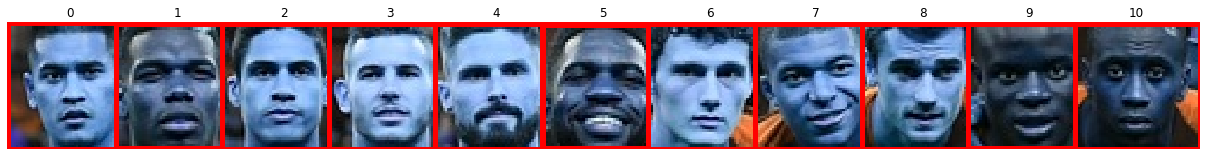

In [11]:
disp_side_by_side(extracted)
#Image.fromarray(extracted[10])

In [12]:
im_ref_mbappe = face_recognition.load_image_file("Kylian_Mbappe.jpg")
mbappe_embeded = face_recognition.face_encodings(im_ref_mbappe)[0]
def is_kyllian (image,threshold = 0.5):
    target_embeded = face_recognition.face_encodings(image)[0]
    results = face_recognition.compare_faces([target_embeded],mbappe_embeded,tolerance=threshold)
    distance = face_recognition.face_distance([target_embeded],mbappe_embeded)
    return results, distance

In [13]:
for i in range(len(extracted)):
    print(is_kyllian(extracted[i]))

([False], array([0.71676342]))
([False], array([0.66512792]))
([False], array([0.73394813]))
([False], array([0.82861181]))
([False], array([0.87154838]))
([False], array([0.60843017]))
([False], array([0.91943915]))
([True], array([0.43956098]))
([False], array([0.92942509]))
([False], array([0.71408296]))
([False], array([0.73050745]))


In [16]:
d=(4,7)

In [17]:
d[0]

4